In [1]:
import os

In [2]:
os.getcwd()

'/Users/admin/Documents/GIT'

In [3]:
os.chdir('/Users/admin/Documents/Python_Code/samplefiles')

In [4]:
import pandas as pd
movies=pd.read_csv('Movie-Ratings.csv')

In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', 'BudgetMillions', 'Year']

In [7]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.Film = movies.Film.astype('category') ### Important to assign the new prop back to the col, otherwise \
                                             ### we are just printing and not changing/overwritting the type 

In [9]:
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [10]:
movies.Genre.cat.categories  #### gives the levels of the factor ~ category

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
# ---- from matplotlib import pyplot as plt  ----
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Joint Plots:

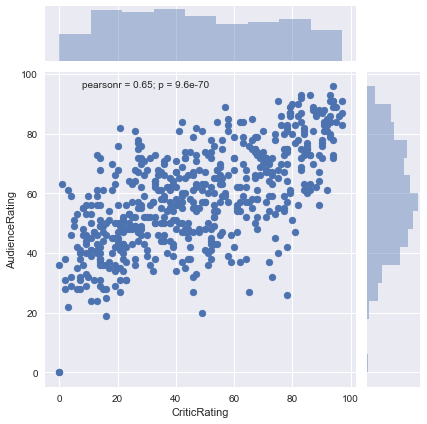

In [12]:
j = sns.jointplot(data=movies, y='AudienceRating', x='CriticRating')

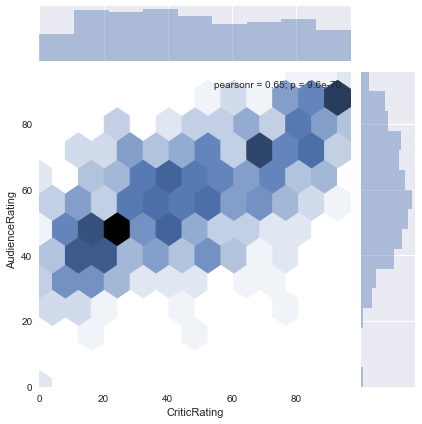

In [13]:
j = sns.jointplot(data=movies, y='AudienceRating', x='CriticRating', kind='hex')

---

## Histograms:

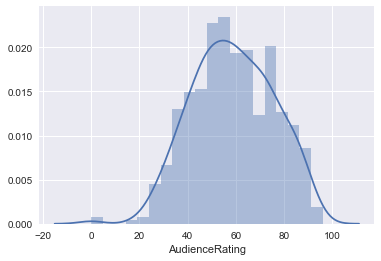

In [14]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRating, bins=20)

## Stacked Histogram:

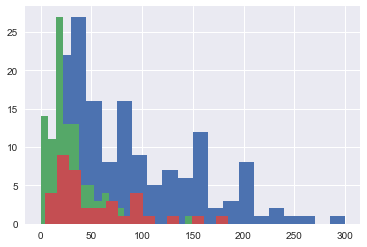

In [15]:
#movies[movies.Genre == 'Drama'].BudgetMillions  ## subset df by Genre = drama and plot budgetmill for the subset...
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=20)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=20)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.show()

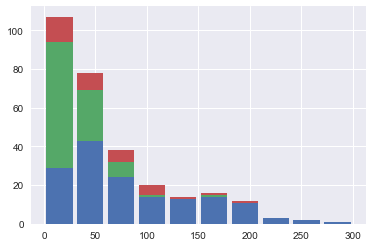

In [16]:
# stack them now...
## create a list of data subsets like...
#[movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions]
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, \
         movies[movies.Genre == 'Thriller'].BudgetMillions], bins = 10, stacked = True, histtype='barstacked', rwidth=0.85)
plt.show()

## rwidth is ratio width or ratio of designated space that a bar should take...if 1 = 100% so bar take all the 
## space leaving no gap


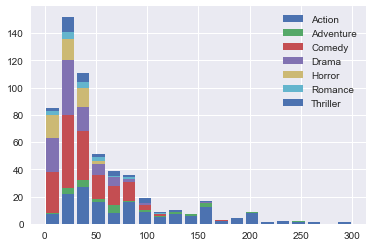

In [17]:
plt_list = []   ### or create plt_list as "list()" .....
mylabel = list()
for gen in movies.Genre.cat.categories:
    plt_list.append(movies[movies.Genre == gen].BudgetMillions)
    mylabel.append(gen)

sns.set_style('darkgrid')
h = plt.hist(plt_list, bins = 20, stacked=True, rwidth = 0.8, label = mylabel)
plt.legend()
plt.show()


# Subplotting: ***Important For Multiplot Grids***   !!!

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

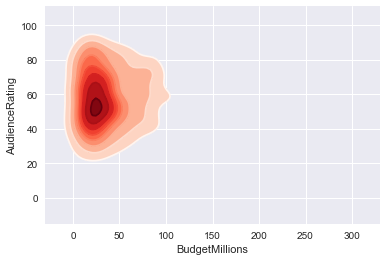

In [19]:
# Create a KDE (Kernel density estimate) plot
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade = True, shade_lowest = False, cmap='Reds')

## shade =True fills contours, shade_lowest=flase will turn off background and bring back the grid, cmap is color map
###Notice the rugged edges...
####Tip to smooth out the edges:
# overlay 2 maps: 1 with shade = true
                # 2nd with shade =false and smooth contour lines only

k2 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap = 'Reds')

## setup kde plots for the subplot grid:

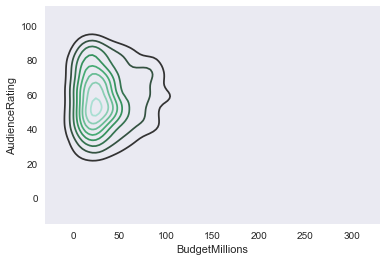

In [20]:
sns.set_style('dark') # turn off grid and set plot background color
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

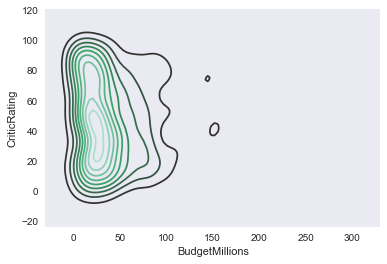

In [21]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

## Setup subplot layout:

[(-20, 160)]

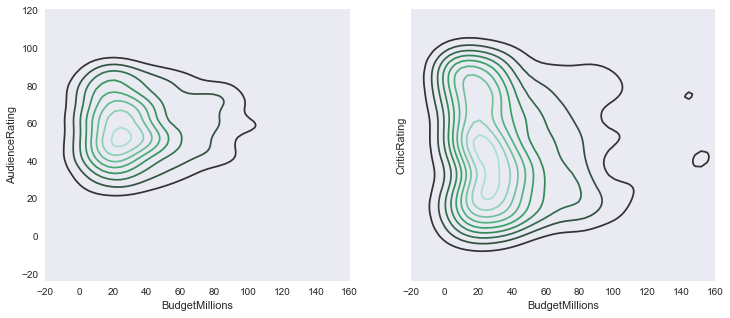

In [22]:
f, axes=plt.subplots(nrows=1,ncols=2, figsize = (12,5), sharex = True, sharey = True)
# Now define the plots:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1])
k1.set(xlim=(-20, 160))

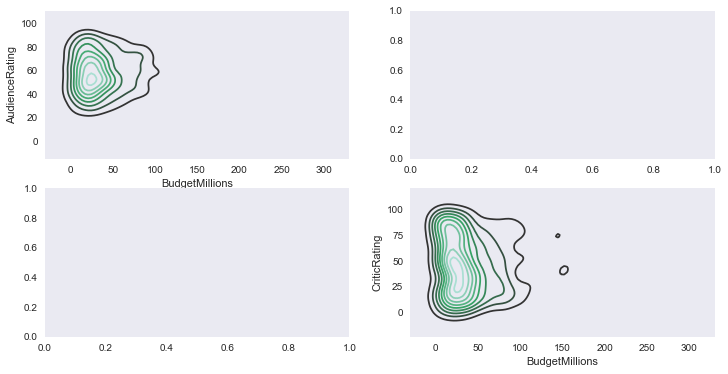

In [23]:
# A 2x2 grid
f, axes=plt.subplots(nrows=2,ncols=2, figsize = (12,6))
# Now define the plots:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax = axes[0,0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax = axes[1,1])

# Violin Plots vs Box Plots

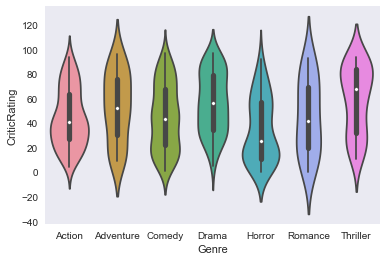

In [24]:
# Violin plot: 
z = sns.violinplot(data = movies, x='Genre', y='CriticRating',)

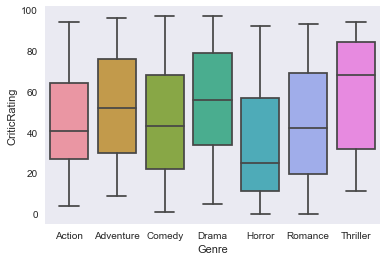

In [25]:
# Box Plot:
w= sns.boxplot(data=movies, x='Genre', y='CriticRating')

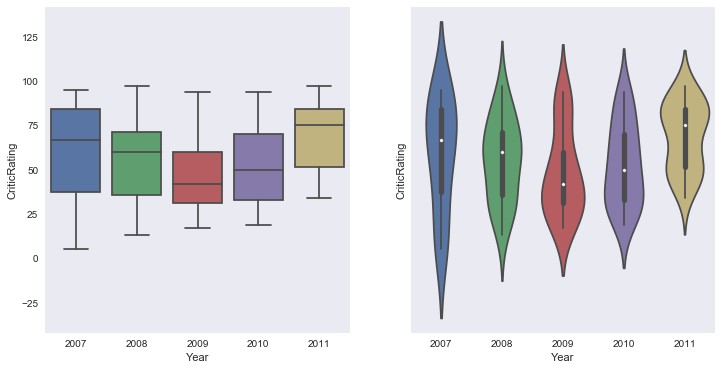

In [26]:
#Drama by year:
f, axes = plt.subplots(1,2, figsize = (12,6), sharex=True, sharey=True)
z1 = sns.boxplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[0])
w1 = sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1])
sns.set_style(style='whitegrid', rc=None)

# Facet grid:

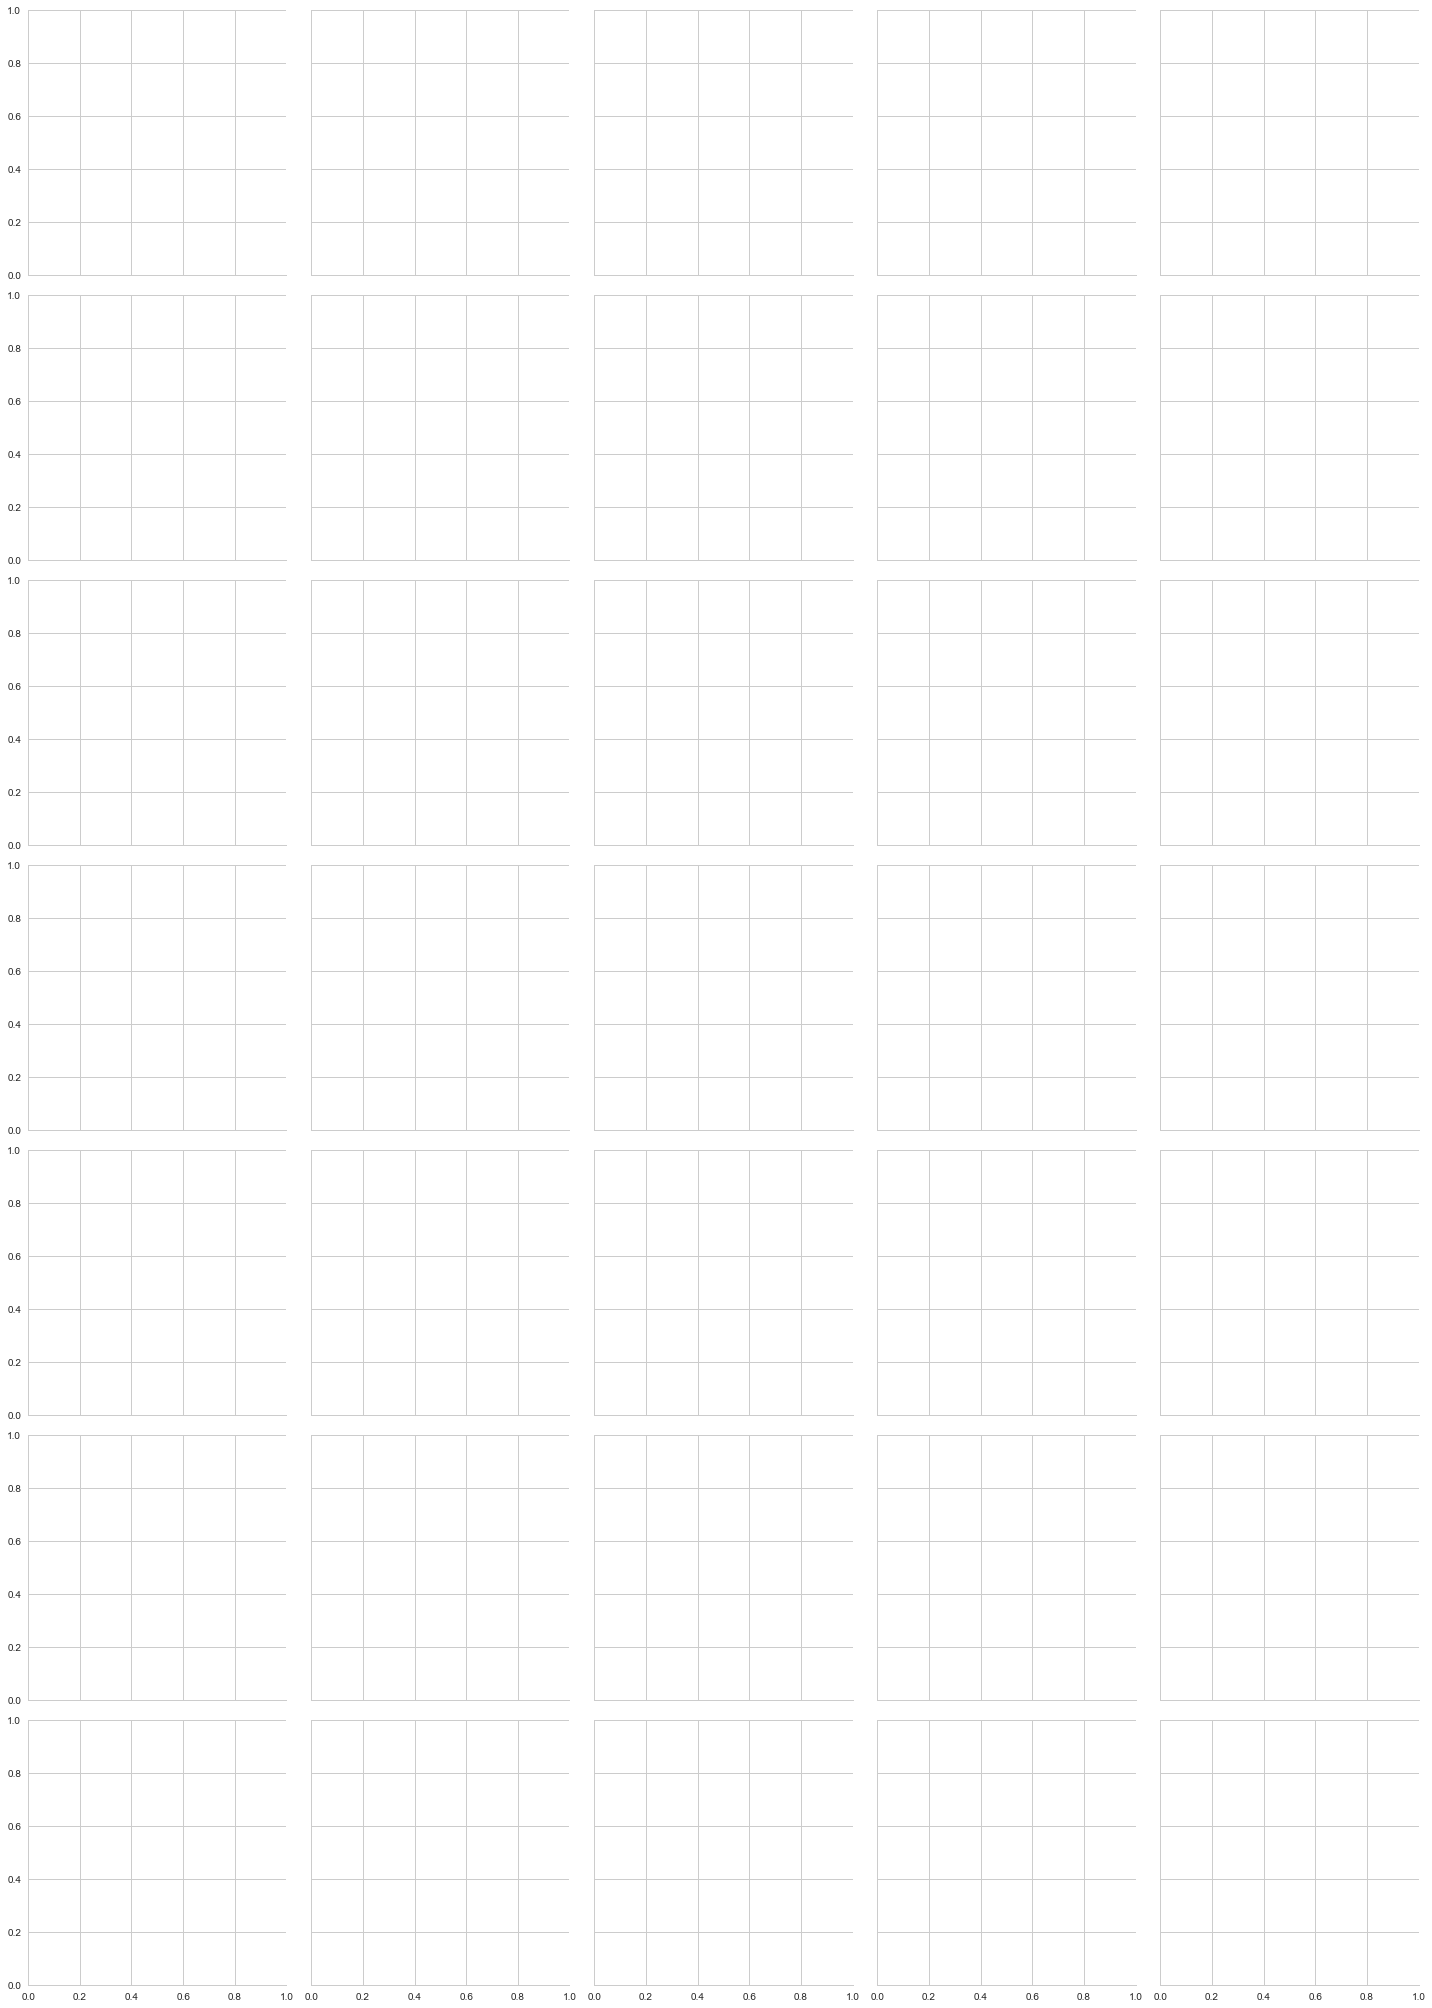

In [27]:
g= sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre', size=4, aspect=1)

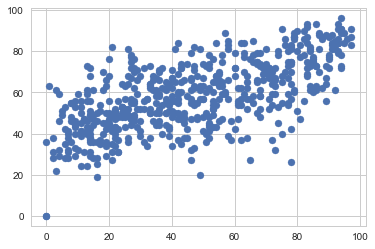

In [28]:
#Simple scatter plot func
plt.scatter(movies.CriticRating, movies.AudienceRating)

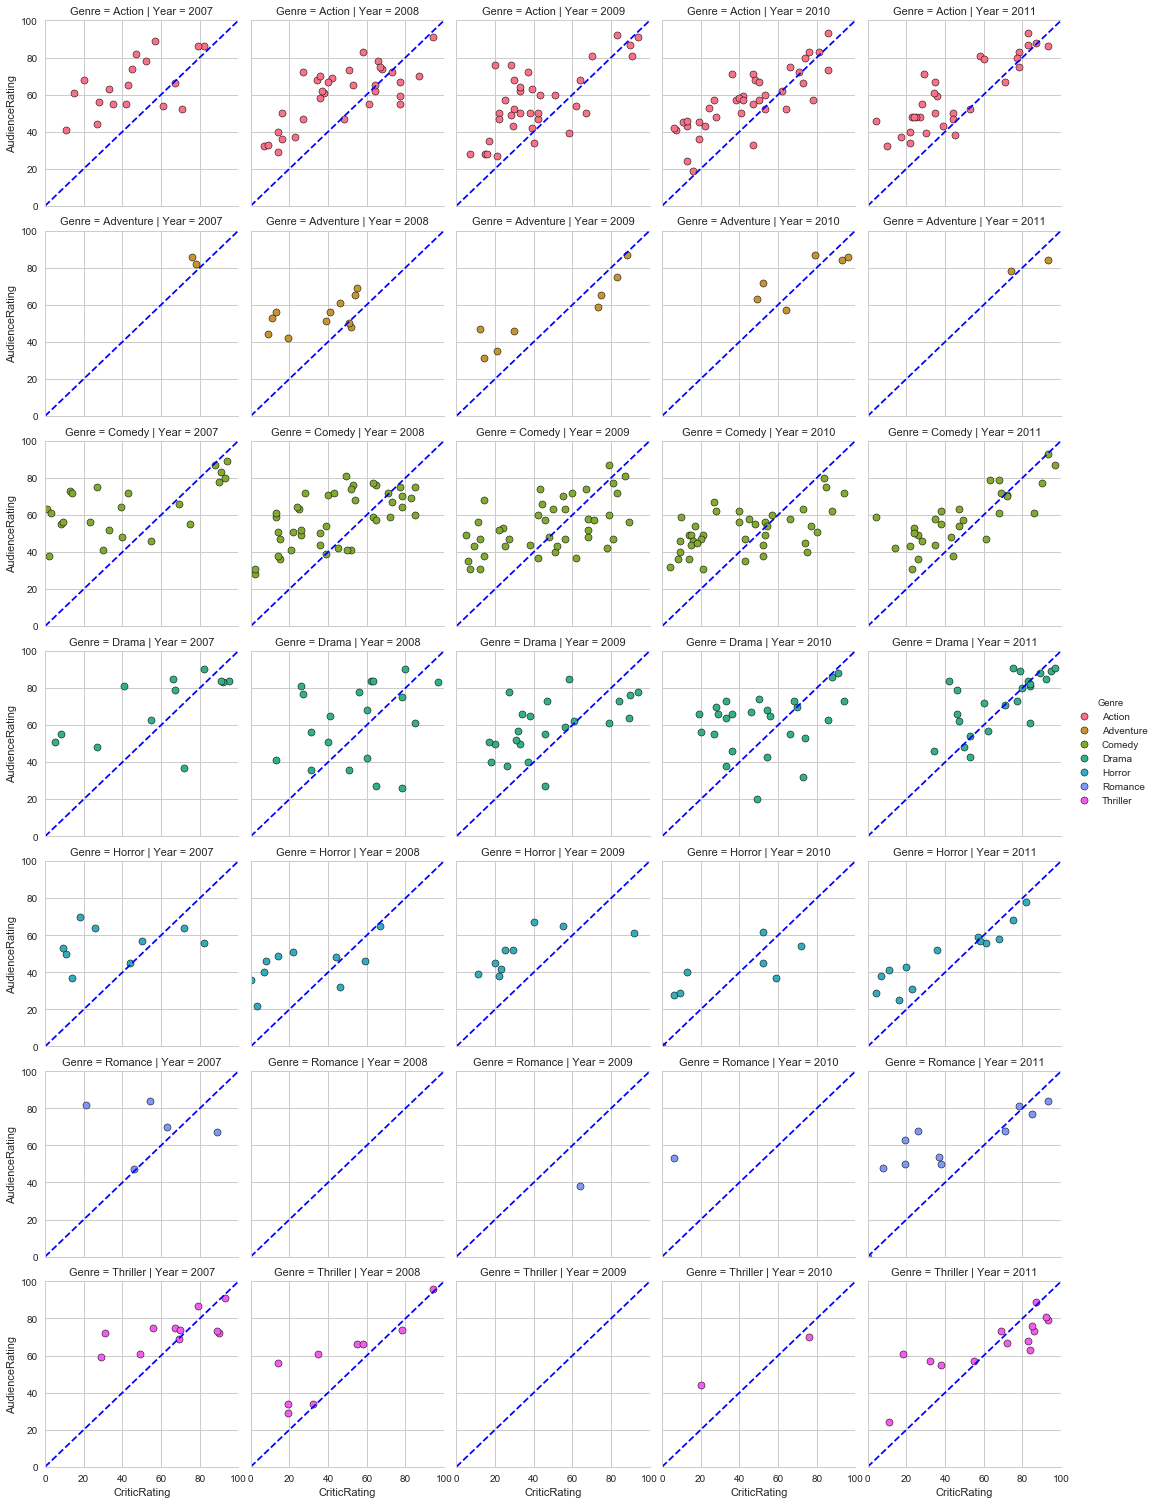

In [29]:
#Use grid mapping to map the plotting function: Apply a plotting function to each facet's subset of the data.
##g.map(func, args*, kwargs**)

#g = g.map(plt.scatter, movies.CriticRating, movies.AudienceRating)

#     **** WILL NOT WORK UNLESS USED TOGETHER WITH FACETGRID   ***********

g = sns.FacetGrid(movies, row='Genre', col='Year', hue = "Genre")

kws=dict(s=50, linewidth=0.5, edgecolor='black')

g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

g.set(xlim=(0,100), ylim=(0,100))

for ax in g.axes.flat:
    ax.plot((0,100), (0,100), ls='--', c='blue')

g.add_legend()

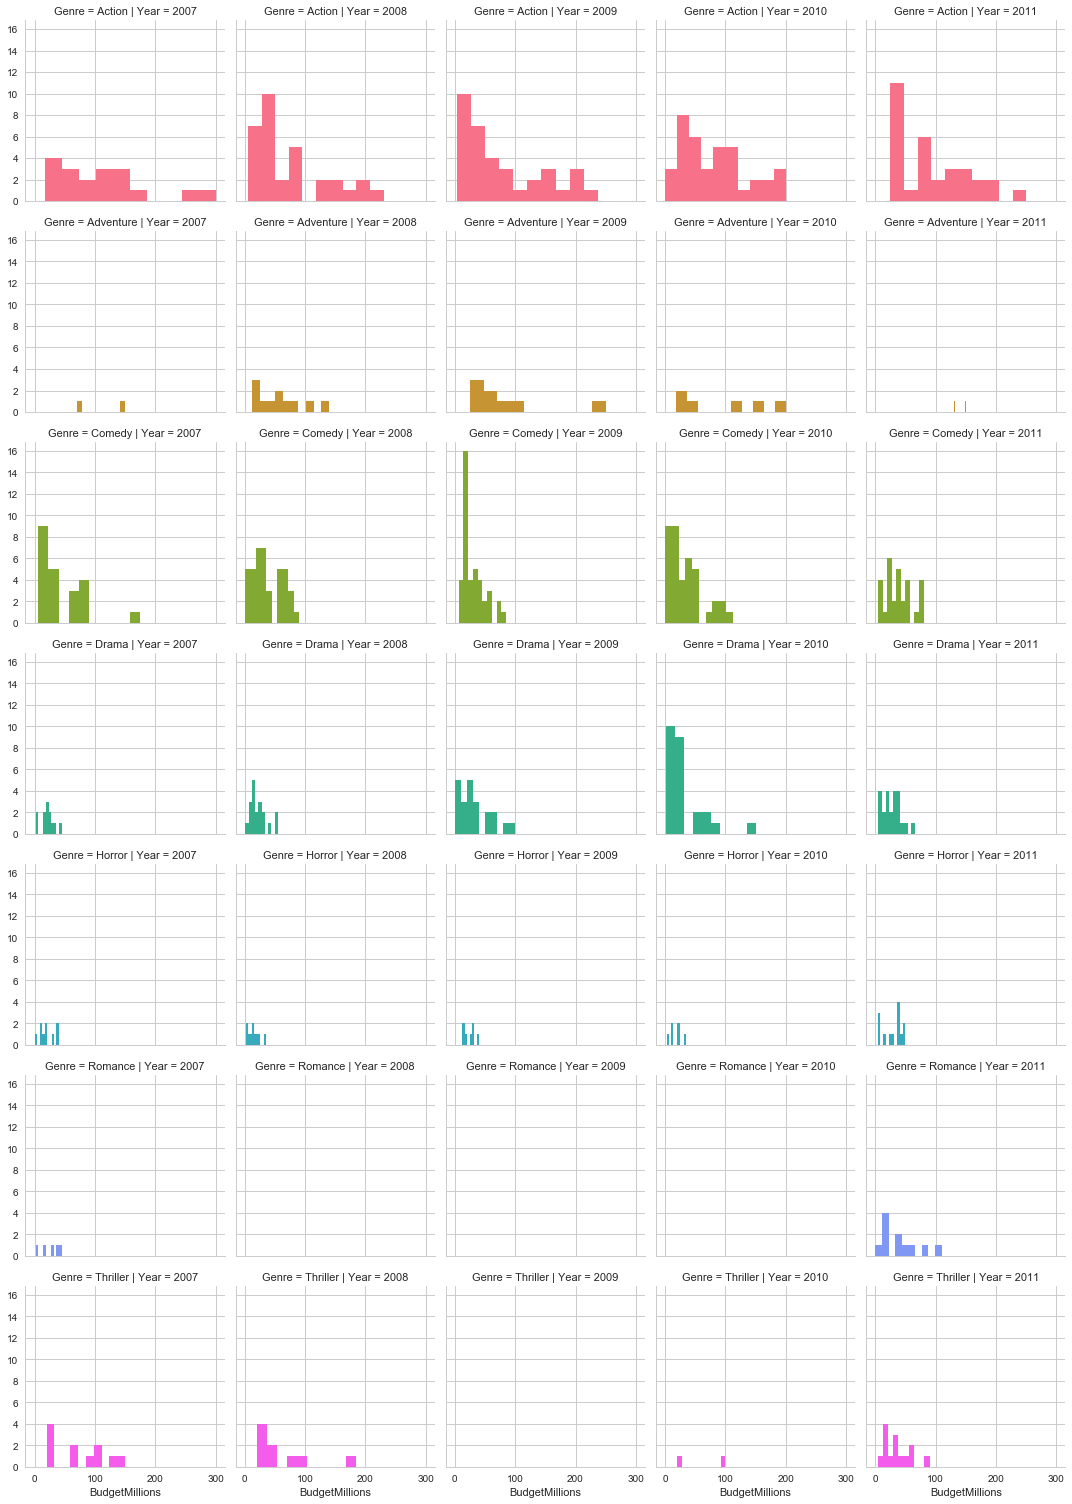

In [30]:
# Can facetwrap any chart type:

g = sns.FacetGrid(movies, row="Genre", col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

# **Creating a dashboard in Python** : Collection of plots

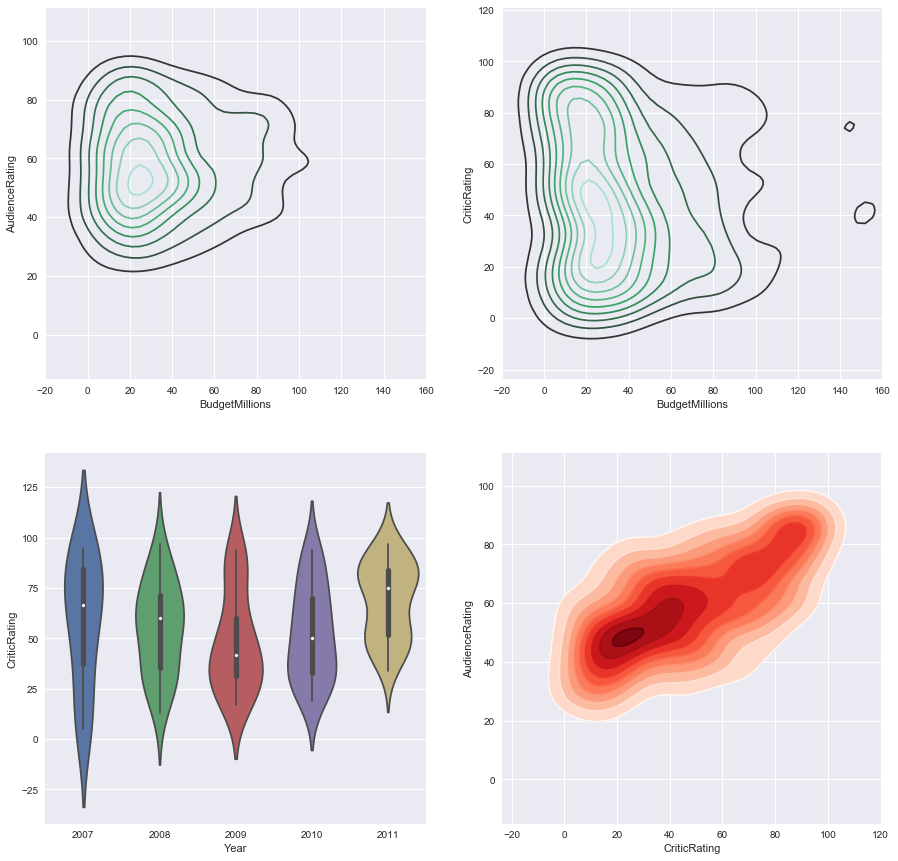

In [31]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))          ### create the layout
# Plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])      ## populate layout with req. charts
# Plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])
# Plot 1,0
z=sns.violinplot(data=movies[movies.Genre=='Drama'], x='Year', y='CriticRating', ax=axes[1,0])
# THE 4TH PLOT FOR AXES[1,1]
k4A = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k4B = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1,1])

## Imp Note: in order to add a pyplot object/graph, the method is different. Need to input as axes[*,*].hist(....)

# axes[1,1].hist(movies.CriticRating, bins=20)

k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))
plt.show()

---

## Styling the plots/dashboards:

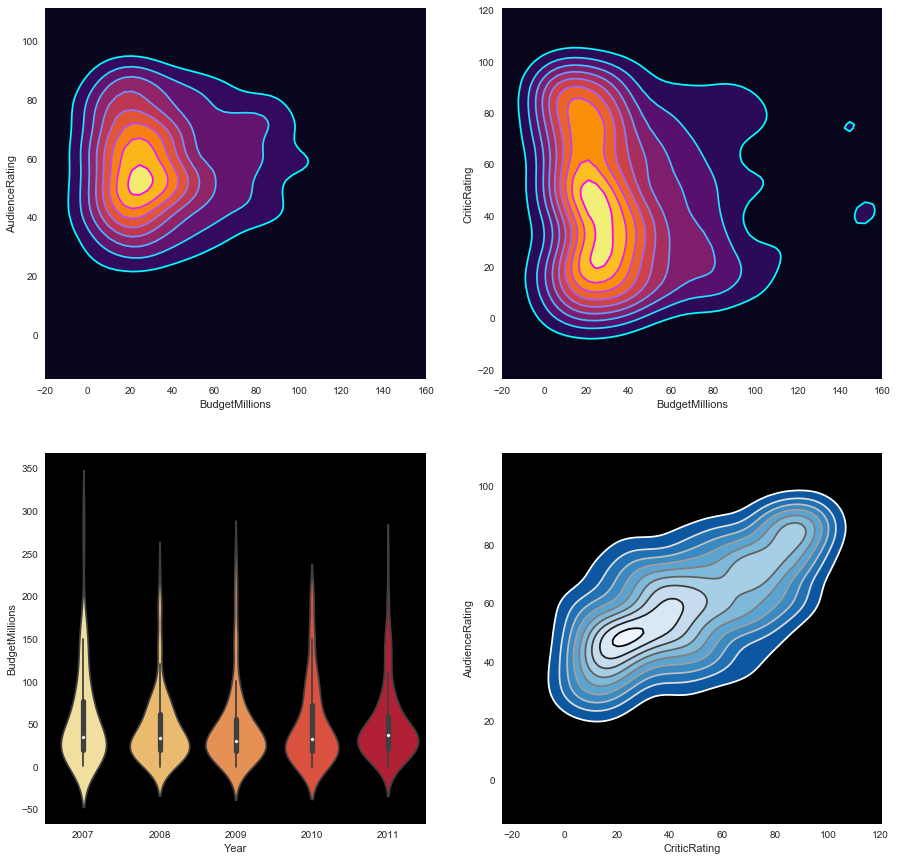

In [32]:
sns.set_style('dark', {'axes.facecolor':'black'})
f, axes = plt.subplots(2,2, figsize = (15,15))          ### create the layout
#################################### Plot 0,0
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, shade = True, shade_lowest = True,\
                 cmap = 'inferno', ax=axes[0,0])      ## populate layout with req. charts
                                                     ### inferno_r will reverse the color order   
##add outline/smoothing of contours to k1
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, cmap = 'cool', ax=axes[0,0])

##################################### Plot 0,1
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, shade = True, shade_lowest = True,\
                 cmap = 'inferno', ax=axes[0,1])      ## populate layout with req. charts
                                                     ### inferno_r will reverse the color order   
##add outline/smoothing of contours to k1
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, cmap = 'cool', ax=axes[0,1])

##################################### Plot 1,0
z=sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette = 'YlOrRd')
# ################################### THE 4TH PLOT FOR AXES[1,1]
k4A = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', \
                  ax=axes[1,1])
k4B = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

## Imp Note: in order to add a pyplot object/graph, the method is different. Need to input as axes[*,*].hist(....)

# axes[1,1].hist(movies.CriticRating, bins=20)

k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))
plt.show()

# Finishing Touches:

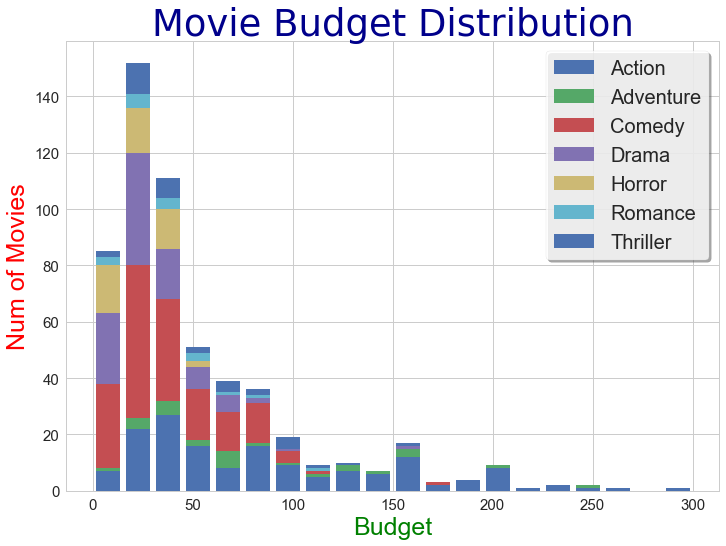

In [33]:
plt_list = []   ### or create plt_list as "list()" .....
mylabel = list()
for gen in movies.Genre.cat.categories:
    plt_list.append(movies[movies.Genre == gen].BudgetMillions)
    mylabel.append(gen)

sns.set_style('whitegrid')
# Trick to change chart size to any diff chart/graph w/o specifying params in the func:
fig, ax = plt.subplots() # sets the subplot area
fig.set_size_inches(11.7, 8.27)  # size of A4 paper
h = plt.hist(plt_list, bins = 20, stacked=True, rwidth = 0.8, label = mylabel)
plt.title('Movie Budget Distribution', fontsize = 37, color = 'DarkBlue', fontname = 'Console')
plt.ylabel('Num of Movies',fontsize=25, color='Red')
plt.xlabel('Budget',fontsize=25, color='Green')
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(frameon=True, fancybox=True, shadow=True, framealpha = 0.8, prop={'size':20})
plt.show()